In [1]:
from sklearn import datasets, mixture
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [12, 4]

In [2]:
iris = datasets.load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Text(0.5, 1.0, 'Dataset of Iris flowers')

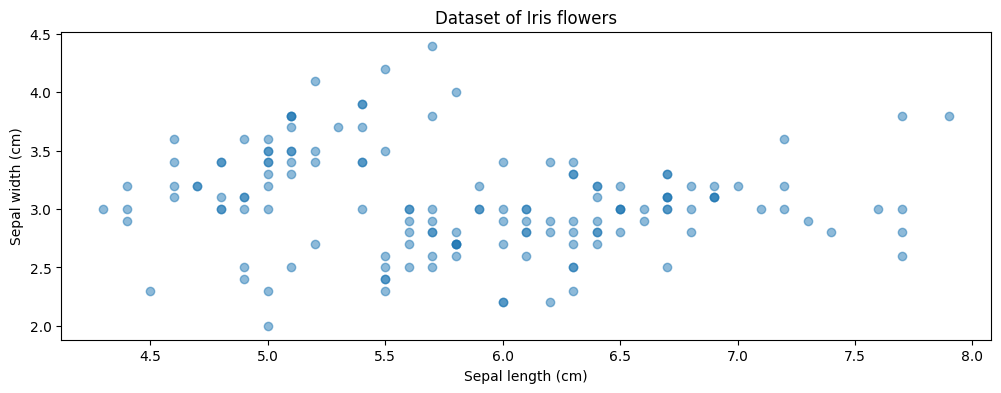

In [5]:
plt.scatter(iris.data[:, 0], iris.data[:, 1], alpha=0.5)
plt.ylabel("Sepal width (cm)")
plt.xlabel("Sepal length (cm)")
plt.title("Dataset of Iris flowers")

In [6]:
# Fit a Gaussian Model with three components
model = mixture.GaussianMixture(n_components=3, covariance_type="full")
model.fit(iris.data[:, [0, 1]])

GaussianMixture(n_components=3)

/var/folders/11/rhw0c0ts1y35h7sf25xp97w40000gn/T/ipykernel_21669/1513689236.py:5: UserWarning: The following kwargs were not used by contour: 'cmp'
  plt.contour(X, Y, Z, levels=np.logspace(0, 10, 1), cmp='gray', alpha=0.5)


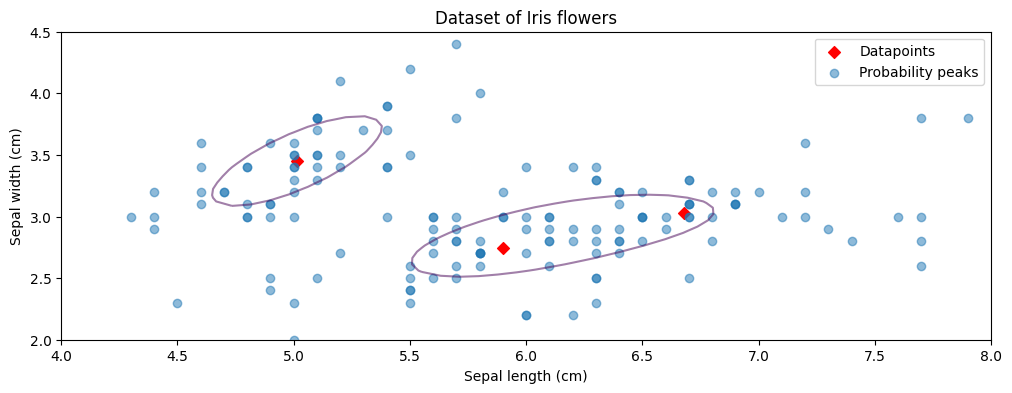

In [7]:
# Diplay learned probabilities as a contour plot
x, y = np.linspace(4.0, 8.0), np.linspace(2.0, 4.5)
X, Y = np.meshgrid(x, y)
Z = -model.score_samples(np.array([X.ravel(), Y.ravel()]).T).reshape(X.shape)
plt.contour(X, Y, Z, levels=np.logspace(0, 10, 1), cmp='gray', alpha=0.5)

plt.scatter(model.means_[:, 0], model.means_[:, 1], marker='D', c='r')


plt.scatter(iris.data[:, 0], iris.data[:, 1], alpha=0.5)
plt.ylabel("Sepal width (cm)")
plt.xlabel("Sepal length (cm)")
plt.title("Dataset of Iris flowers")

plt.legend(['Datapoints', 'Probability peaks'])

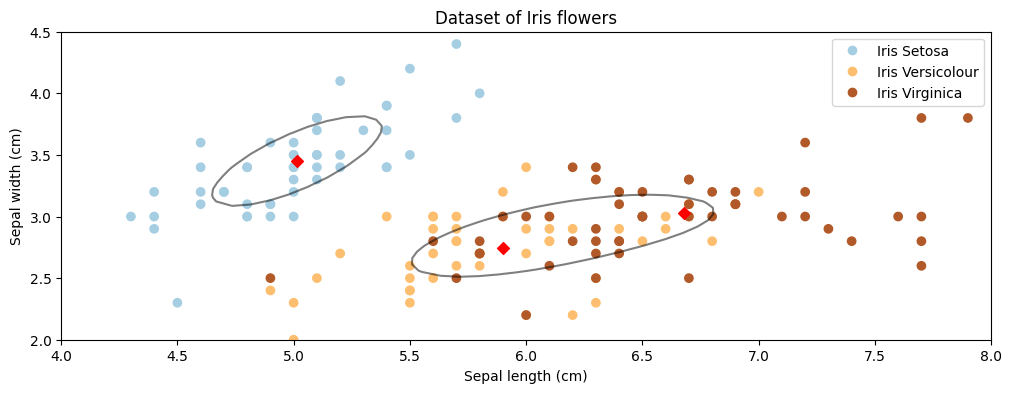

In [8]:
CS = plt.contour(X, Y, Z, levels=np.logspace(0, 30, 1), cmap='gray', alpha=0.5)

p1 = plt.scatter(iris.data[:,0], iris.data[:,1], alpha=1, c=iris.target, cmap='Paired')

plt.scatter(model.means_[:,0], model.means_[:,1], marker='D', c='r')

plt.ylabel("Sepal width (cm)")
plt.xlabel("Sepal length (cm)")
plt.title("Dataset of Iris flowers")
plt.legend(handles=p1.legend_elements()[0], labels=['Iris Setosa', 'Iris Versicolour', 'Iris Virginica'])